# HW-1

In [54]:
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [55]:
df = pd.read_csv("pima-indians-diabetes.data.csv", header=None)

In [56]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
X = df.drop(columns=[8])
X.head()

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [58]:
y = df[8]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: 8, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
X_train.head()

,0,1,2,3,4,5,6,7
357,13,129,0,30,0,39.9,0.569,44
73,4,129,86,20,270,35.1,0.231,23
352,3,61,82,28,0,34.4,0.243,46
497,2,81,72,15,76,30.1,0.547,25
145,0,102,75,23,0,0.0,0.572,21


In [61]:
X_test.head()

,0,1,2,3,4,5,6,7
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [75]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(8, )))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
# model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=['acc'])

In [76]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
18/18 [==============================] - 0s 7ms/step - loss: 6.2857 - acc: 0.4427 - val_loss: 4.0645 - val_acc: 0.4219
Epoch 2/20
18/18 [==============================] - 0s 2ms/step - loss: 2.6180 - acc: 0.4167 - val_loss: 1.4962 - val_acc: 0.4323
Epoch 3/20
18/18 [==============================] - 0s 2ms/step - loss: 1.0901 - acc: 0.4965 - val_loss: 0.9445 - val_acc: 0.5625
Epoch 4/20
18/18 [==============================] - 0s 2ms/step - loss: 0.8833 - acc: 0.5747 - val_loss: 0.8535 - val_acc: 0.5729
Epoch 5/20
18/18 [==============================] - 0s 2ms/step - loss: 0.7824 - acc: 0.6024 - val_loss: 0.7920 - val_acc: 0.6146
Epoch 6/20
18/18 [==============================] - 0s 2ms/step - loss: 0.7599 - acc: 0.6111 - val_loss: 0.7762 - val_acc: 0.5938
Epoch 7/20
18/18 [==============================] - 0s 2ms/step - loss: 0.7341 - acc: 0.6181 - val_loss: 0.7532 - val_acc: 0.6406
Epoch 8/20
18/18 [==============================] - 0s 2ms/step - loss: 0.7250 - acc: 0.62

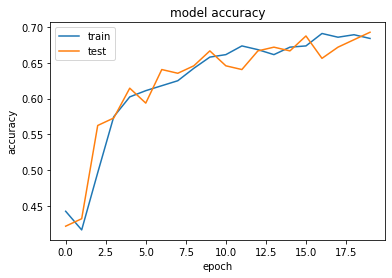

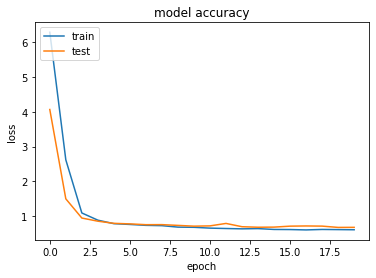

In [77]:
import matplotlib.pyplot as plt

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc='upper left')
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc='upper left')
plt.show()

# HW-2

In [162]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [163]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [164]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [165]:
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32')/255.
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32')/255.

In [166]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [167]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [168]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [169]:
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3361 - accuracy: 0.9071 - val_loss: 0.2314 - val_accuracy: 0.9314
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1716 - accuracy: 0.9506 - val_loss: 0.1441 - val_accuracy: 0.9583
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1303 - accuracy: 0.9622 - val_loss: 0.1235 - val_accuracy: 0.9630
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1071 - accuracy: 0.9689 - val_loss: 0.1150 - val_accuracy: 0.9658
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0910 - accuracy: 0.9734 - val_loss: 0.1053 - val_accuracy: 0.9704
